## Graduate Admissions

This project analysis Graduate Admission dataset from an Indian perspective. Main goal of this project is to predict admission chances for particular university. Several features are considered as important:
<br>
1) GRE Scores  - 290 to 340
<br>
2) TOEFL Scores - 92 to 120
<br>
3) University Rating - 1 to 5
<br>
4) Statement of Purpose (SOP) - 1 to 5
<br>
5) Undergraduate GPA - 6.80 to 9.92
<br>
6) Reaserch Experience - either True or Folse  (1,0)
<br>
<br>
Target values:
<br>
1) Chance of Admit - 0 to 1


In [1]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
#read the dataset
df = pd.read_csv('Admission_Predict.csv', encoding='latin-1')

## Take a look at the Data

In [2]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Check for missing values

In [3]:
print('Missing values:', df.isnull().values.any())
print("No missing values, which is good.")

Missing values: False
No missing values, which is good.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


There are 400 rows and 9 columns, memory usage is 28.2 KB so This is considered as small dataset.

In [5]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


### Checking for correlations between features

In [6]:
# checking for correlations using pandas corr method

corr_matrix = df.drop(["Serial No."], axis=1).corr()
print(corr_matrix['Chance of Admit '].sort_values(ascending=False))

Chance of Admit      1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Name: Chance of Admit , dtype: float64


All features are positive correlated with Chance of Admission. 

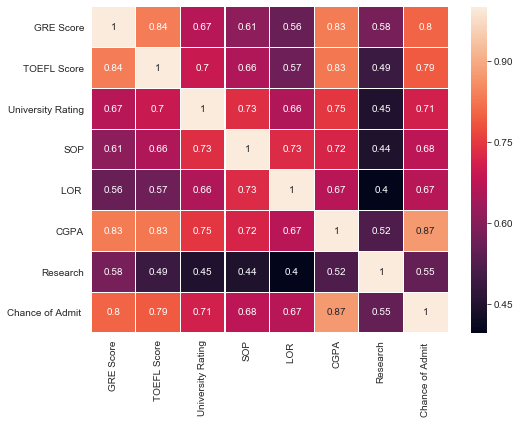

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=0.02)

Feature correlation between each other. CGPA and Chance of Admission seem to be most correlated columns

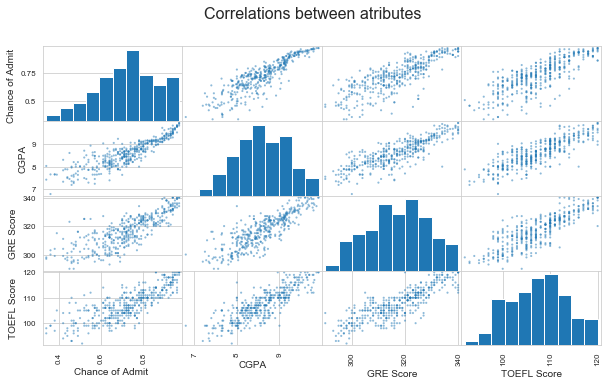

In [8]:
# visualze correlations using pandas scatter matrix method
from pandas.plotting import scatter_matrix

scatter_matrix(df[["Chance of Admit ", "CGPA", "GRE Score", "TOEFL Score"]],\
               figsize=(10,5.5), s=18, alpha = 0.5)
plt.suptitle('Correlations between atributes', fontsize=16)
plt.show()

## Exploratory Data Analysis

Let's take a look at our target value - Chance of Admission.
We will transform Chance of Admission column into 7 categories, so we can plot meaningful histograms. 

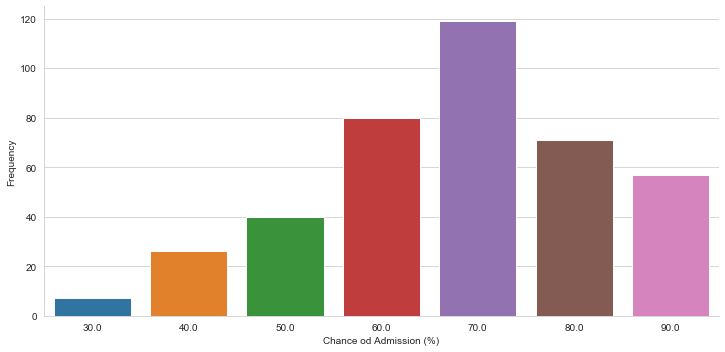

In [9]:
df["Chance_cat"] = np.floor(df["Chance of Admit "] * 10) * 10
fg = sns.catplot('Chance_cat', data=df, kind='count', aspect=2)
fg.set_ylabels("Frequency")
fg.set_xlabels('Chance od Admission (%)')
plt.show()

As we can see, most of students/applicants (119 of them) have Chance of Admission in range of 70-80 %. It can be noted that there are many students whose admission is almost certain (more then 90%) - 57 of them. Also, there are no students with Chance of Admission lower then 30%

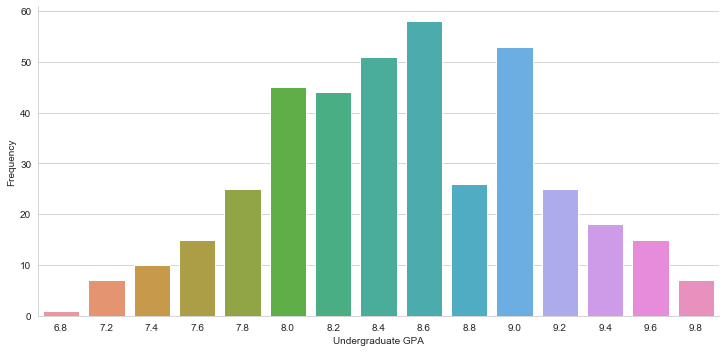

In [10]:
df["CGPA_cat"] = np.floor(df["CGPA"] * 5) / 5
fg = sns.catplot("CGPA_cat", data=df, kind='count', aspect=2)
fg.set_ylabels("Frequency")
fg.set_xlabels("Undergraduate GPA")
plt.show()

It seems that Undergraduate GPA has nearly Gaussian distribution centered at 8.6-8.8. There is also significant decline in number of students in categories 7.8 - 8.0 and 8.8 - 9.0 which tell as that students were quite motivated not to belong in that categories but to achieve 8.0+ and 9.0+ GPA score.

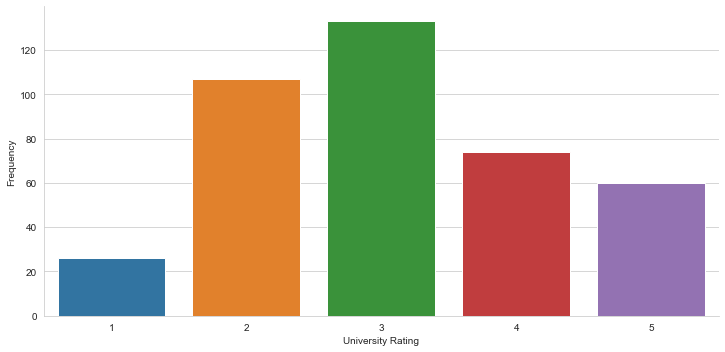

In [11]:
fg = sns.catplot('University Rating', data=df, kind='count', aspect=2)
fg.set_ylabels("Frequency")
fg.set_xlabels('University Rating')
plt.show()

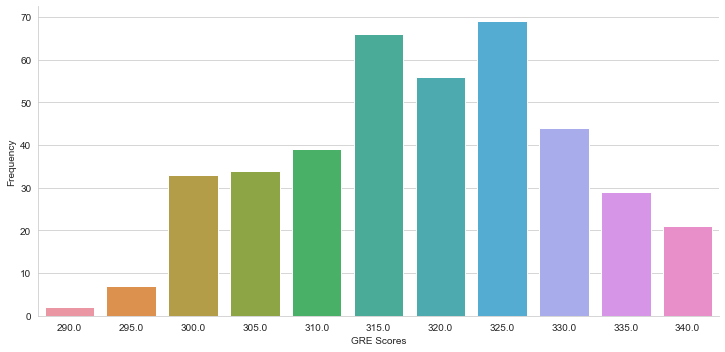

In [12]:
df["GRE Score Cat"] = np.ceil(df["GRE Score"] / 5) * 5
fg = sns.catplot('GRE Score Cat', data=df, kind='count', aspect=2)
fg.set_ylabels("Frequency")
fg.set_xlabels('GRE Scores')
plt.show()

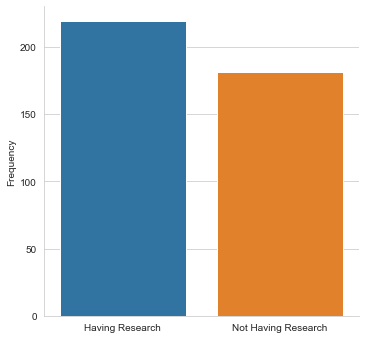

In [13]:
df["Research_cat"] = np.where(df["Research"].values == 1, 'Having Research',
                              'Not Having Research')
fg = sns.catplot('Research_cat', data=df, kind='count', aspect=1)
fg.set_ylabels("Frequency")
fg.set_xlabels('')
plt.show()

There are 55 % of all applicants with Research experience.

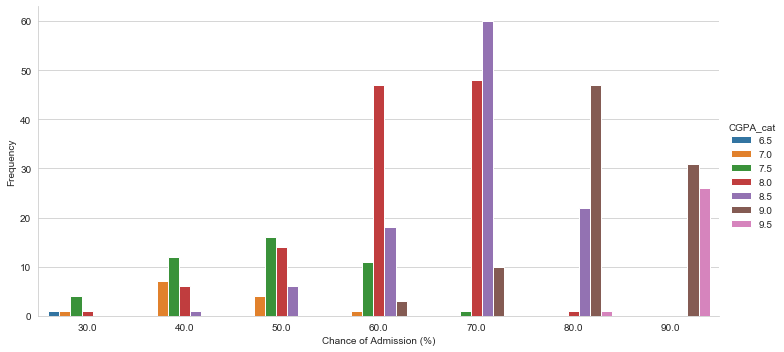

In [14]:
df["CGPA_cat"] = np.floor(df["CGPA"] * 2) / 2
fg = sns.catplot("Chance_cat", data=df, kind='count', hue='CGPA_cat', aspect=2)
fg.set_ylabels("Frequency")
fg.set_xlabels("Chance of Admission (%)")
plt.show()

As we know undergraduate GPA is strongly correlated to Chance of Admission (the more the better) so no wonder that applicants with Chance of Admission higher then 90% have no less then 9.0 undergraduate GPA. Almost the same observation holds even for category 80-90% which illustrate us how this important is undergraduate GPA.

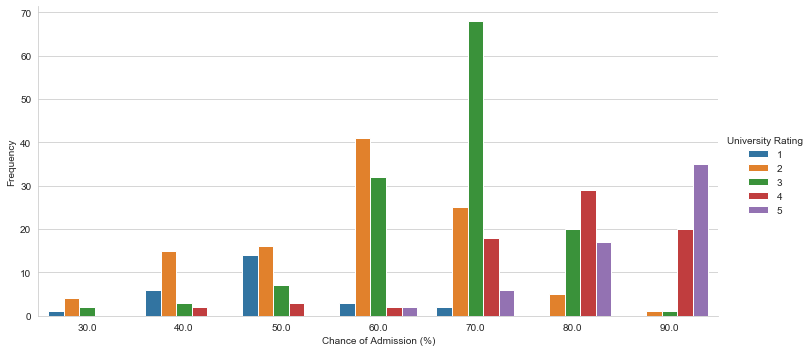

In [15]:
fg = sns.catplot('Chance_cat',
                 data=df,
                 kind='count',
                 hue='University Rating',
                 aspect=2)
fg.set_ylabels("Frequency")
fg.set_xlabels('Chance of Admission (%)')
plt.show()

As expected, the University Rating that student/applicant belongs to is positive correlated to Chance of Admission, so that almost all students which belong to Universtiy of Rating 4 and 5 have chance of admission higher then 80%. There are although few exceptions - we note that there are students with Chance of Admission higher then 80% (or even higher then 90%) which belong to Universties of rating 2 or 3.

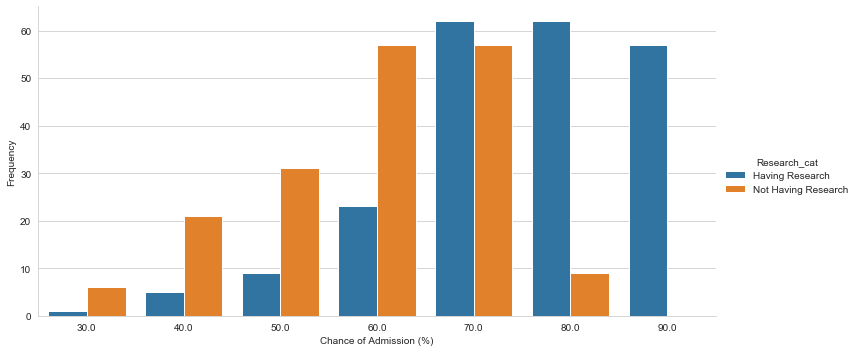

In [16]:
df["Research_cat"] = np.where(df["Research"].values==1,'Having Research','Not Having Research')
fg = sns.catplot('Chance_cat', data=df,  kind='count', hue='Research_cat', aspect=2)
fg.set_ylabels("Frequency")
fg.set_xlabels('Chance of Admission (%)')
plt.show()

It seems that all students with Chance of Admission higher then 90% have Research experience. In category 80-90% Chance of Admission still dominate students with Research experience. For 70-80% Chance of Admission their number is almost equal to the number of students without Research experience but for lower then 70% most of student have no Research experience.

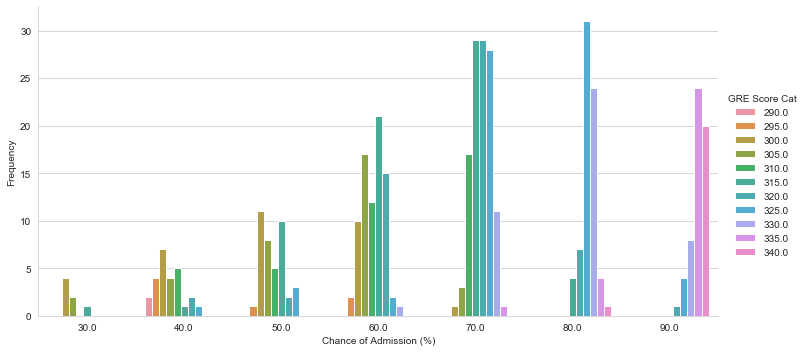

In [17]:
fg = sns.catplot('Chance_cat',
                 data=df,
                 kind='count',
                 hue='GRE Score Cat',
                 aspect=2)
fg.set_ylabels("Frequency")
fg.set_xlabels('Chance of Admission (%)')
plt.show()

We already know that GRE Score is tight correlated with Chance for Admission, we can also observe from the above diagram that:
<br>
$\cdot$ Among students with 90-100% Chance of Admission most of then have GRE Score in range 335-340 and there are no students with lower GRE Score than 320.
<br>
$\cdot$ Among students with 60-90% Chance of Admission most of then have GRE score in range of 305-330
<br>
$\cdot$ All students with higher GRE score then 335 have Chance of Admission higher then 70%
<br>
$\cdot$ Among students with Chance of Admission lower then 50%, there are no students with GRE Score higher then 320

In [18]:
df.drop(["Chance_cat", "CGPA_cat","Research_cat","GRE Score Cat"], axis=1, inplace=True)

## Machine Learning Models

In [19]:
# preprocessing data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA

# features values
X = df.drop(["Serial No.", "Chance of Admit "], axis=1).values

# target values
y = df["Chance of Admit "].values

# normalize the dataset

sc = MinMaxScaler()
X_norm = sc.fit_transform(X)

#pca = PCA(n_components=4)
#pca.fit_transform(X_std, y)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2)

In [20]:
def plot_errors(y_true, y_predict, num_sample, title):

    sample_ind = np.random.randint(0, len(y_true), size=num_sample)
    sample_true = y_true[sample_ind]
    sample_predict = y_predict[sample_ind]

    plt.figure(figsize=(14, 6))
    plt.scatter(np.arange(num_sample),
                sample_true,
                marker='v',
                s=50,
                label='True values')
    plt.scatter(np.arange(num_sample),
                sample_predict,
                marker='x',
                c='red',
                s=50,
                label='Predicted values')
    val = [i for i in range(num_sample) for j in range(2)]
    s = []
    for i in range(num_sample):
        s.append(sample_true[i])
        s.append(sample_predict[i])
    for i in range(num_sample):
        plt.plot(val[2 * i:2 * i + 2], s[2 * i:2 * i + 2], '--', c='green')
    plt.legend(loc='best')
    plt.xticks(np.arange(0, num_sample))
    plt.grid(alpha=0.4)
    plt.ylabel("Chance of Admission", fontsize=12)
    plt.title(title, fontsize=16)
    plt.show()

    r2_ = r2_score(y_true, y_predict)
    mse = mean_squared_error(y_true, y_predict)
    print("Mean Squared Error for {0}: {1:.3f}".format(title, mse))
    print("R Squared Metric for {0}: {1:.3f}".format(title, r2_))

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(n_jobs=-1,)
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)

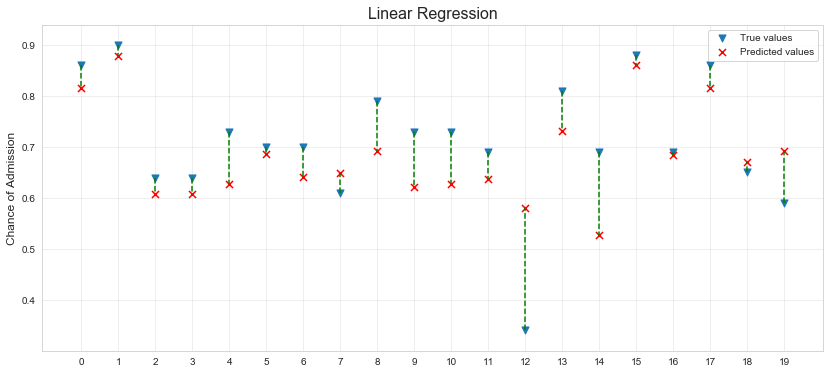

Mean Squared Error for Linear Regression: 0.006
R Squared Metric for Linear Regression: 0.747


In [22]:
plot_errors(y_test, y_predict_lr, 20, 'Linear Regression')

In [23]:
from sklearn.svm import SVR

svr = SVR(gamma="auto", )
svr.fit(X_train, y_train)
y_predict_svr = lr.predict(X_test)

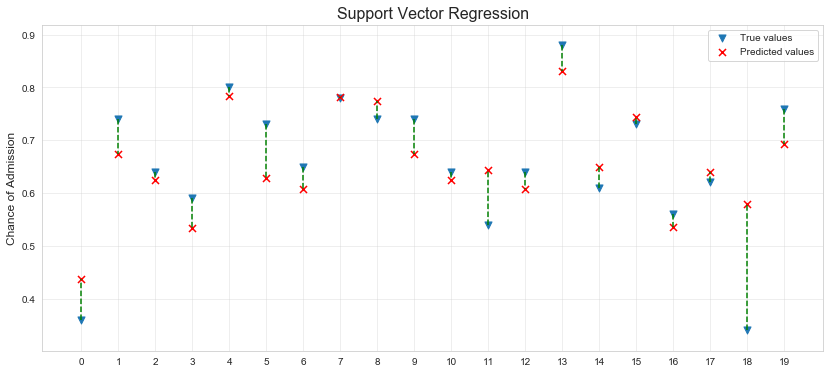

Mean Squared Error for Support Vector Regression: 0.006
R Squared Metric for Support Vector Regression: 0.747


In [24]:
plot_errors(y_test, y_predict_svr, 20, 'Support Vector Regression')

In [25]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20)
rf.fit(X_train, y_train)

y_predict_rf = rf.predict(X_test)

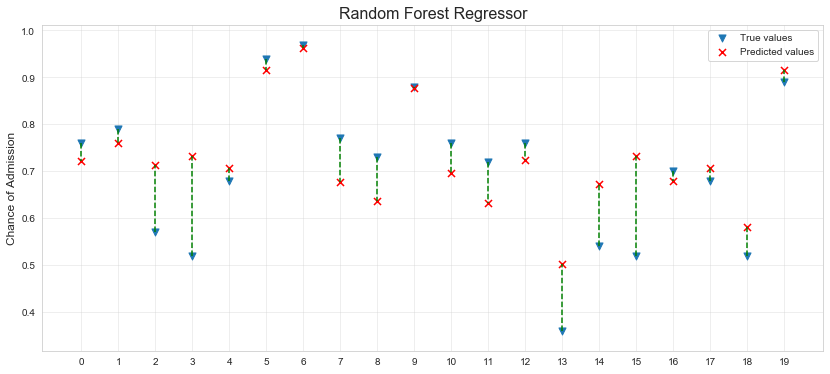

Mean Squared Error for Random Forest Regressor: 0.007
R Squared Metric for Random Forest Regressor: 0.682


In [26]:
plot_errors(y_test, y_predict_rf, 20, 'Random Forest Regressor')

In [27]:
import keras
from keras import layers
import tensorflow as tf

keras_model = keras.Sequential([
    layers.Dense(2**8, activation='relu', input_shape=[X_train.shape[1]]),
    layers.Dropout(0.5),
    layers.Dense(2**7, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2**6, activation=None),
    layers.Dense(1)
])
optimizer = tf.keras.optimizers.RMSprop(0.001)

keras_model.compile(
    loss='mse',
    optimizer=optimizer,
    metrics=['mae', 'mse'])

keras_model.fit(X_train, y_train, epochs = 500, verbose=0)
y_predict_keras = keras_model.predict(X_test)

Using TensorFlow backend.


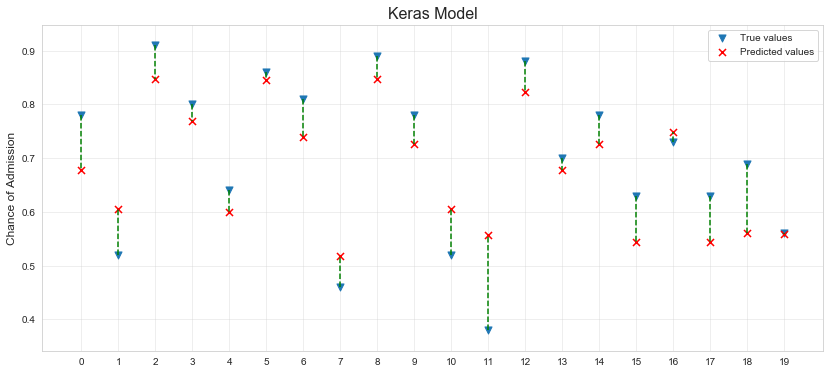

Mean Squared Error for Keras Model: 0.007
R Squared Metric for Keras Model: 0.671


In [28]:
plot_errors(y_test, y_predict_keras, 20, 'Keras Model')

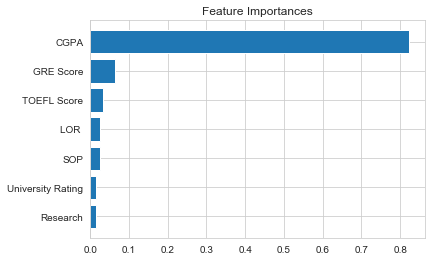

In [29]:
feature_names = df.drop(["Serial No.", "Chance of Admit "], axis=1).columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = feature_names
importance_frame['Importance'] = rf.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'],
                                                ascending=True)

plt.barh(range(7), importance_frame['Importance'])
plt.yticks(range(7), importance_frame['Features'])
plt.xlabel('')
plt.title('Feature Importances')
plt.show()